# Análise Exploratória e Tratamento de Dados

Os bancos desempenham um papel crucial nas economias de mercado. Eles decidem quem pode obter financiamento e em que termos e podem tomar ou quebrar decisões de investimento. Para que os mercados e a sociedade funcionem, indivíduos e empresas precisam de acesso ao crédito.

Algoritmos de pontuação de crédito, que fazem um palpite sobre a probabilidade de inadimplência, são o método que os bancos usam para determinar se um empréstimo deve ou não ser concedido. Esta competição exige que os participantes melhorem o estado da arte na pontuação de crédito, prevendo a probabilidade de que alguém experimente dificuldades financeiras nos próximos dois anos.

O objetivo desta competição é construir um modelo que os mutuários possam usar para ajudar a tomar as melhores decisões financeiras.

Dados históricos são fornecidos sobre 250.000 mutuários e a premiação é de US$ 5.000 (US$ 3.000 para o primeiro, US$ 1.500 para o segundo e US$ 500 para o terceiro).

### Instalando as bibliotecas

Inicialmente, vamos importar as bibliotecas que iremos usar:

In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import altair as alt

Agora, vamos carregar os dataframes e ver o seu tamanho:

In [163]:
dictionary = pd.read_csv("Data Dictionary.csv", index_col=0) # dicionario das features
df_train_raw = pd.read_csv("cs-training.csv", index_col=0) # dataframe de treino sem o índice
df_test_raw  = pd.read_csv("cs-test.csv",  index_col=0) # dataframe de teste sem o índice
probability = pd.read_csv("sampleEntry.csv", index_col=0) # probabilidades do teste

print("TRAIN shape:", df_train_raw.shape)
print("TEST  shape:", df_test_raw.shape)
print("PROB  shape:", probability.shape)

TRAIN shape: (150000, 11)
TEST  shape: (101503, 11)
PROB  shape: (101503, 1)


Com os dados em mão, vamos observar algum padrão ou algo que possa atrapalhar a análise:

In [164]:
dictionary

,Description,Type
Variable Name,,
SeriousDlqin2yrs,Person experienced 90 days past due delinquenc...,Y/N
RevolvingUtilizationOfUnsecuredLines,Total balance on credit cards and personal lin...,percentage
age,Age of borrower in years,integer
NumberOfTime30-59DaysPastDueNotWorse,Number of times borrower has been 30-59 days p...,integer
DebtRatio,"Monthly debt payments, alimony,living costs di...",percentage
MonthlyIncome,Monthly income,real
NumberOfOpenCreditLinesAndLoans,Number of Open loans (installment like car loa...,integer
NumberOfTimes90DaysLate,Number of times borrower has been 90 days or m...,integer
NumberRealEstateLoansOrLines,Number of mortgage and real estate loans inclu...,integer


In [165]:
df_train_raw.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [166]:
df_test_raw.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,0.0,101503.000000,101503.000000,101503.000000,101503.000000,8.140000e+04,101503.000000,101503.000000,101503.000000,101503.000000,98877.000000
mean,NaN,5.310000,52.405436,0.453770,344.475020,6.855036e+03,8.453514,0.296691,1.013074,0.270317,0.769046
std,NaN,196.156039,14.779756,4.538487,1632.595231,3.650860e+04,5.144100,4.515859,1.110253,4.503578,1.136778
min,NaN,0.000000,21.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,0.030131,41.000000,0.000000,0.173423,3.408000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,0.152586,52.000000,0.000000,0.364260,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,NaN,0.564225,63.000000,0.000000,0.851619,8.200000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,NaN,21821.000000,104.000000,98.000000,268326.000000,7.727000e+06,85.000000,98.000000,37.000000,98.000000,43.000000


In [167]:
probability.describe()

,Probability
count,101503.000000
mean,0.067664
std,0.110445
min,0.003513
25%,0.011705
50%,0.023285
75%,0.067193
max,0.826056


In [168]:
df_train_raw.head(10)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
6,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0
7,0,0.305682,57,0,5710.000000,NaN,8,0,3,0,0.0
8,0,0.754464,39,0,0.209940,3500.0,8,0,0,0,0.0
9,0,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN
10,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0


In [169]:
df_test_raw.head(10)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0
6,NaN,0.509791,63,0,0.342429,4140.0,4,0,0,0,1.0
7,NaN,0.587778,50,0,1048.000000,0.0,5,0,0,0,3.0
8,NaN,0.046149,79,1,0.369170,3301.0,8,0,1,0,1.0
9,NaN,0.013527,68,0,2024.000000,NaN,4,0,1,0,0.0
10,NaN,1.000000,23,98,0.000000,0.0,0,98,0,98,0.0


In [170]:
probability.head(10)

,Probability
Id,
1,0.080807
2,0.040719
3,0.011968
4,0.067640
5,0.108264
6,0.027520
7,0.047294
8,0.041027
9,0.004223


Percebe-se que temos alguns dados faltando, assim, vamos vizualizar a matriz que mostra a distribuição dessas ausências, inicialmente com o de treino:

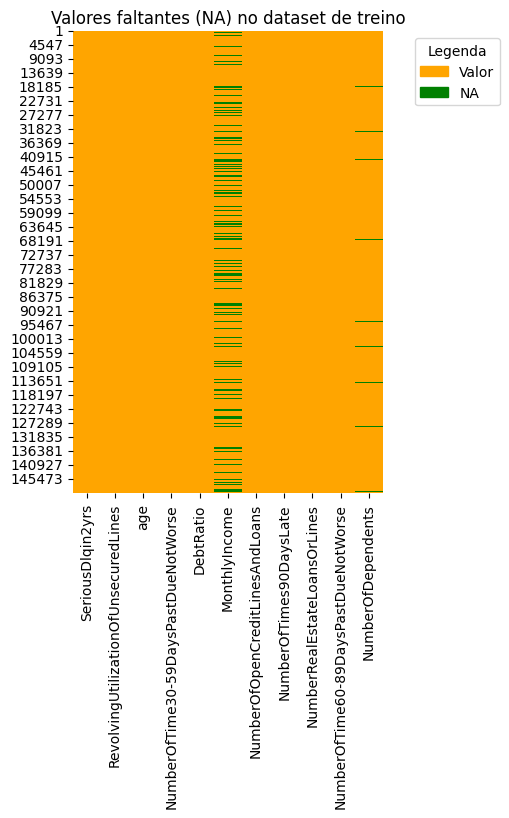

In [171]:
composite_train = df_train_raw.isna().astype(int)

colors = ['orange', 'green']  # 0 = Valor, 1 = NaN
custom_cmap = sns.color_palette(colors)

plt.figure(figsize=(4, 6))
sns.heatmap(composite_train, cbar=False, cmap=custom_cmap, vmax=1, vmin=0)
handles = [plt.Rectangle((0,0),1,1, color=custom_cmap[i]) for i in range(len(colors))]
plt.legend(handles, ["Valor", "NA"], title="Legenda", loc="upper right", bbox_to_anchor=(1.4, 1))
plt.title("Valores faltantes (NA) no dataset de treino")
plt.show()

Com o de teste:

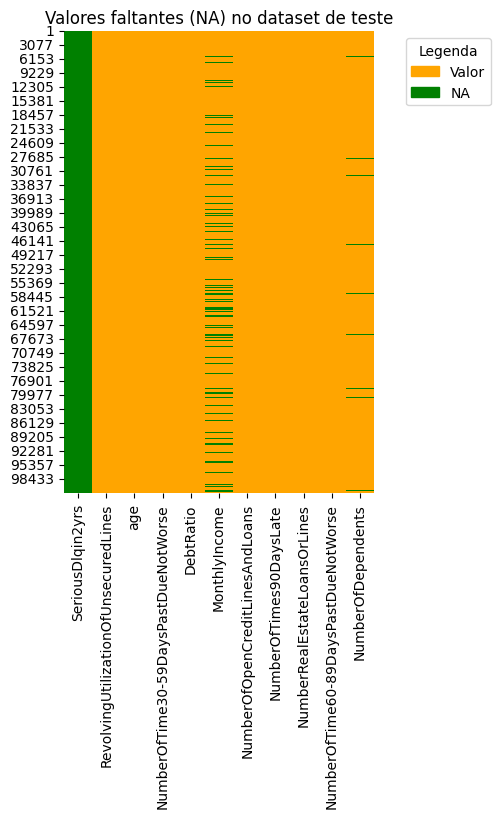

In [172]:
composite_test = df_test_raw.isna().astype(int)

colors = ['orange', 'green']  # 0 = Valor, 1 = NaN
custom_cmap = sns.color_palette(colors)

plt.figure(figsize=(4, 6))
sns.heatmap(composite_test, cbar=False, cmap=custom_cmap, vmax=1, vmin=0)
handles = [plt.Rectangle((0,0),1,1, color=custom_cmap[i]) for i in range(len(colors))]
plt.legend(handles, ["Valor", "NA"], title="Legenda", loc="upper right", bbox_to_anchor=(1.4, 1))
plt.title("Valores faltantes (NA) no dataset de teste")
plt.show()

Observe que em ambos os datasets temos dados faltando nas features `MonthlyIncome` e `NumberOfDependents`. Além disso, percebe-se que no dataset de treino temos a feature `SeriousDlqin2yrs` sem dados. Isso acontece, porque nesse dataset queremos prever essa feature. Agora, vamos contar quantos são esse dados faltantes:

In [173]:
na_count = pd.DataFrame({
    "Dataset de Treino": df_train_raw.isna().sum(), # conta cada dado faltante em cada feature no dataset de treino
    "Dataset de Teste": df_test_raw.isna().sum()  # conta cada dado faltante em cada feature no dataset de teste
})

na_count

,Dataset de Treino,Dataset de Teste
SeriousDlqin2yrs,0,101503
RevolvingUtilizationOfUnsecuredLines,0,0
age,0,0
NumberOfTime30-59DaysPastDueNotWorse,0,0
DebtRatio,0,0
MonthlyIncome,29731,20103
NumberOfOpenCreditLinesAndLoans,0,0
NumberOfTimes90DaysLate,0,0
NumberRealEstateLoansOrLines,0,0
NumberOfTime60-89DaysPastDueNotWorse,0,0


Como forma de planejamento e organização, vamos trabalhar com duas pastas, a `processed_data` e `clean_data`. A pasta `processed_data` terá dois dataset, sendo de treino e teste, ambos com todos os dados, exceto os sem informação em `NumberOfDependents`. Já a pasta `clean_data` terá dois datasets, sendo de treino e teste, ambos sem dados ausentes:

In [174]:
df_train = df_train_raw.dropna(subset=['NumberOfDependents'])
df_train

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


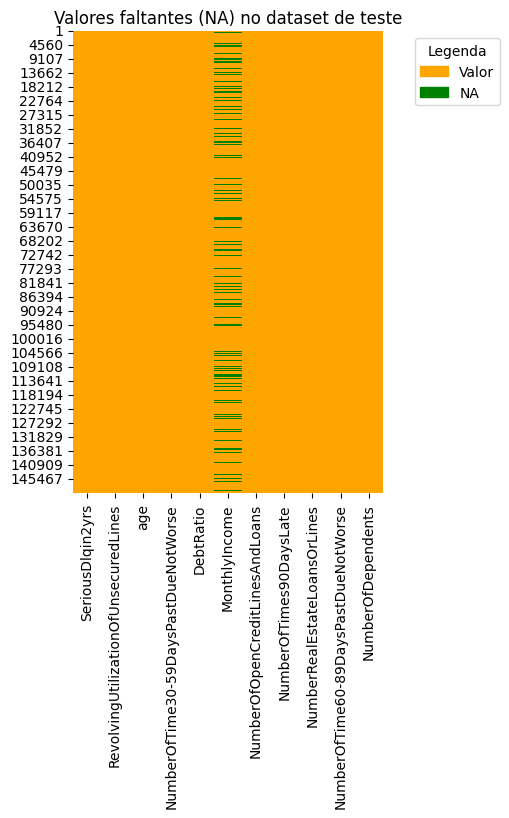

In [175]:
composite_train = df_train.isna().astype(int)

colors = ['orange', 'green']  # 0 = Valor, 1 = NaN
custom_cmap = sns.color_palette(colors)

plt.figure(figsize=(4, 6))
sns.heatmap(composite_train, cbar=False, cmap=custom_cmap, vmax=1, vmin=0)
handles = [plt.Rectangle((0,0),1,1, color=custom_cmap[i]) for i in range(len(colors))]
plt.legend(handles, ["Valor", "NA"], title="Legenda", loc="upper right", bbox_to_anchor=(1.4, 1))
plt.title("Valores faltantes (NA) no dataset de teste")
plt.show()

In [176]:
df_train.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,146076.000000,146076.000000,146076.000000,146076.000000,146076.000000,1.202690e+05,146076.000000,146076.000000,146076.000000,146076.000000,146076.000000
mean,0.067410,5.922272,52.099277,0.407945,333.373603,6.670221e+03,8.529279,0.250698,1.029717,0.225027,0.757222
std,0.250732,250.070774,14.604005,4.002747,1943.906679,1.438467e+04,5.149533,3.977197,1.132774,3.962048,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.031018,41.000000,0.000000,0.171764,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.158818,52.000000,0.000000,0.357751,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.563684,62.000000,0.000000,0.766117,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,107.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [177]:
df_test_raw['SeriousDlqin2yrs'] = probability.values
df_test = df_test_raw.dropna(subset=['NumberOfDependents'])
df_test

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,0.080807,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
2,0.040719,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
3,0.011968,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
4,0.067640,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
5,0.108264,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
101498,0.004911,0.045230,67,0,0.012198,5000.0,4,0,0,0,0.0
101499,0.045363,0.282653,24,0,0.068522,1400.0,5,0,0,0,0.0
101500,0.343775,0.922156,36,3,0.934217,7615.0,8,0,2,0,4.0
101502,0.121994,0.335457,56,0,3568.000000,NaN,8,0,2,1,3.0


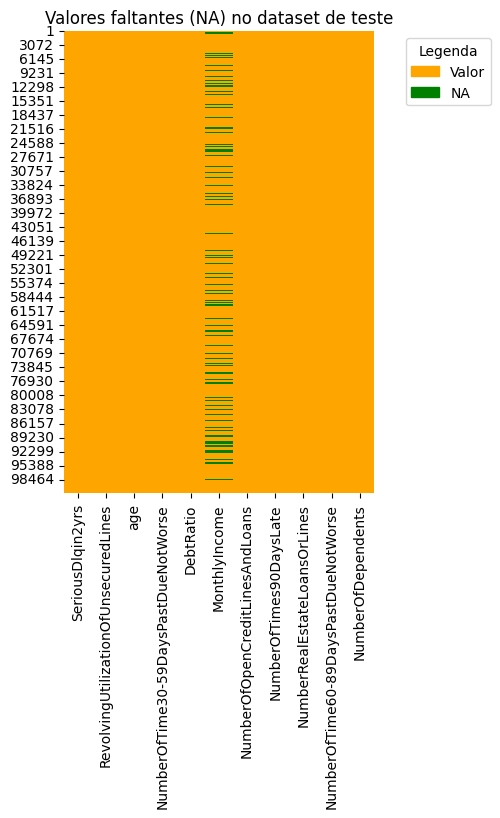

In [178]:
composite_test = df_test.isna().astype(int)

colors = ['orange', 'green']  # 0 = Valor, 1 = NaN
custom_cmap = sns.color_palette(colors)

plt.figure(figsize=(4, 6))
sns.heatmap(composite_test, cbar=False, cmap=custom_cmap, vmax=1, vmin=0)
handles = [plt.Rectangle((0,0),1,1, color=custom_cmap[i]) for i in range(len(colors))]
plt.legend(handles, ["Valor", "NA"], title="Legenda", loc="upper right", bbox_to_anchor=(1.4, 1))
plt.title("Valores faltantes (NA) no dataset de teste")
plt.show()

In [179]:
df_test_raw.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,101503.000000,101503.000000,101503.000000,101503.000000,101503.000000,8.140000e+04,101503.000000,101503.000000,101503.000000,101503.000000,98877.000000
mean,0.067664,5.310000,52.405436,0.453770,344.475020,6.855036e+03,8.453514,0.296691,1.013074,0.270317,0.769046
std,0.110445,196.156039,14.779756,4.538487,1632.595231,3.650860e+04,5.144100,4.515859,1.110253,4.503578,1.136778
min,0.003513,0.000000,21.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.011705,0.030131,41.000000,0.000000,0.173423,3.408000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.023285,0.152586,52.000000,0.000000,0.364260,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.067193,0.564225,63.000000,0.000000,0.851619,8.200000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,0.826056,21821.000000,104.000000,98.000000,268326.000000,7.727000e+06,85.000000,98.000000,37.000000,98.000000,43.000000


In [180]:
df_train.shape, df_test.shape

((146076, 11), (98877, 11))

In [181]:
# Salva os datasets na pasta processed_data
df_train.to_csv("../processed_data/train_complete.csv", index=False)
df_test.to_csv("../processed_data/test_complete.csv", index=False)

In [182]:
df_train_clean = df_train.dropna()
df_test_clean = df_test.dropna()

df_train_clean.shape, df_test_clean.shape

((120269, 11), (81400, 11))

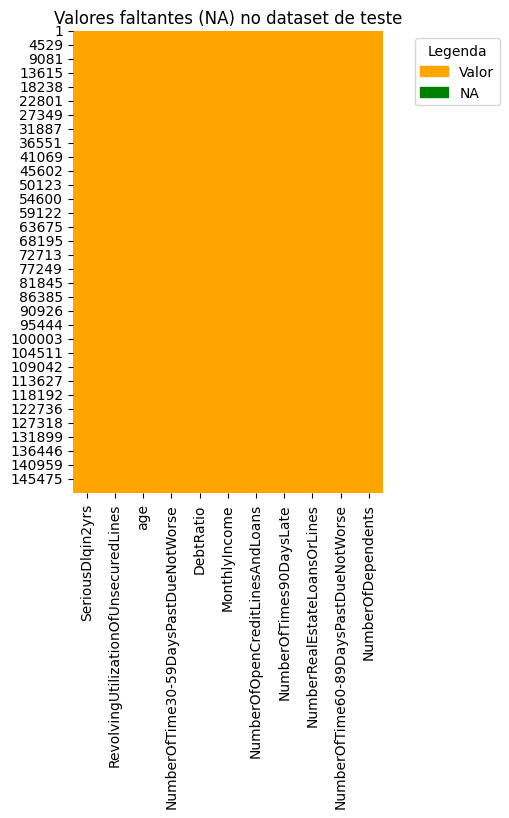

In [183]:
composite_train = df_train_clean.isna().astype(int)

colors = ['orange', 'green']  # 0 = Valor, 1 = NaN
custom_cmap = sns.color_palette(colors)

plt.figure(figsize=(4, 6))
sns.heatmap(composite_train, cbar=False, cmap=custom_cmap, vmax=1, vmin=0)
handles = [plt.Rectangle((0,0),1,1, color=custom_cmap[i]) for i in range(len(colors))]
plt.legend(handles, ["Valor", "NA"], title="Legenda", loc="upper right", bbox_to_anchor=(1.4, 1))
plt.title("Valores faltantes (NA) no dataset de teste")
plt.show()

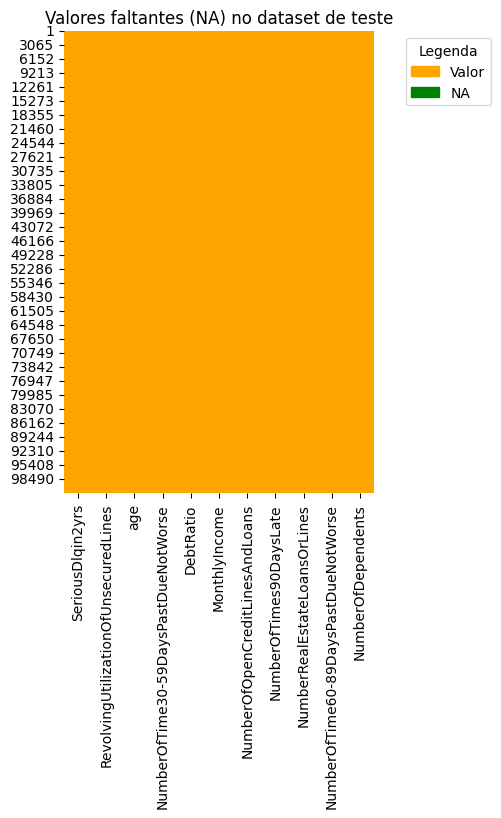

In [184]:
composite_test = df_test_clean.isna().astype(int)

colors = ['orange', 'green']  # 0 = Valor, 1 = NaN
custom_cmap = sns.color_palette(colors)

plt.figure(figsize=(4, 6))
sns.heatmap(composite_test, cbar=False, cmap=custom_cmap, vmax=1, vmin=0)
handles = [plt.Rectangle((0,0),1,1, color=custom_cmap[i]) for i in range(len(colors))]
plt.legend(handles, ["Valor", "NA"], title="Legenda", loc="upper right", bbox_to_anchor=(1.4, 1))
plt.title("Valores faltantes (NA) no dataset de teste")
plt.show()

In [185]:
df_train_clean.to_csv("../clean_data/train_clean.csv", index=False)
df_test_clean.to_csv("../clean_data/test_clean.csv", index=False)

In [186]:
# Todos os dados juntos e embaralhados
df_all = pd.concat([df_train, df_test], ignore_index=True)
df_all = df_all.sample(frac=1, random_state=42).reset_index(drop=True)
df_all.to_csv("../all_data/all_data.csv", index=False)